In [1]:
import torch
import numpy as np
import pandas as pd
import sensorium
import warnings
warnings.filterwarnings('ignore')
from nnfabrik.builder import get_data, get_model, get_trainer
import matplotlib.pyplot as plt

## Dividing the images from each dataset into natural and masked images with the corresponding responses.

In [2]:
frame_aperture_r_a = np.load("../data/new_data2023/static29027-6-17-1-6-5-GrayImageNetFrame2-7bed7f7379d99271be5d144e5e59a8e7/meta/trials/frame_aperture_r.npy")
trials_a = np.load("../data/new_data2023/static29027-6-17-1-6-5-GrayImageNetFrame2-7bed7f7379d99271be5d144e5e59a8e7/meta/trials/tiers.npy")
frame_image_ids_a = np.load("../data/new_data2023/static29027-6-17-1-6-5-GrayImageNetFrame2-7bed7f7379d99271be5d144e5e59a8e7/meta/trials/frame_image_id.npy")

In [3]:
frame_aperture_r_wt = np.load("../data/new_data2023/static29028-1-17-1-6-5-GrayImageNetFrame2-7bed7f7379d99271be5d144e5e59a8e7/meta/trials/frame_aperture_r.npy")
trials_wt = np.load("../data/new_data2023/static29028-1-17-1-6-5-GrayImageNetFrame2-7bed7f7379d99271be5d144e5e59a8e7/meta/trials/tiers.npy")
frame_image_ids_wt = np.load("../data/new_data2023/static29028-1-17-1-6-5-GrayImageNetFrame2-7bed7f7379d99271be5d144e5e59a8e7/meta/trials/frame_image_id.npy")

In [4]:
masked_i_trials_a = trials_a[frame_aperture_r_a=="Decimal('0.200')"]
masked_i_ids_a = frame_image_ids_a[frame_aperture_r_a=="Decimal('0.200')"]
ni_i_trials_a = trials_a[frame_aperture_r_a=="Decimal('2.000')"]
ni_i_ids_a = frame_image_ids_a[frame_aperture_r_a=="Decimal('2.000')"]

In [5]:
masked_i_trials_wt = trials_wt[frame_aperture_r_wt=="Decimal('0.200')"]
masked_i_ids_wt = frame_image_ids_wt[frame_aperture_r_wt=="Decimal('0.200')"]
ni_i_trials_wt = trials_wt[frame_aperture_r_wt=="Decimal('2.000')"]
ni_i_ids_wt = frame_image_ids_wt[frame_aperture_r_wt=="Decimal('2.000')"]

In [6]:
df_a = pd.DataFrame({"frame_image_ids": frame_image_ids_a, "trials": trials_a, "frame_aperture_r": frame_aperture_r_a}).reset_index()
df_wt = pd.DataFrame({"frame_image_ids": frame_image_ids_wt, "trials": trials_wt, "frame_aperture_r": frame_aperture_r_wt}).reset_index()


In [7]:
masked_image_ids_a_temp = df_a.loc[(df_a.trials == "train")].reset_index(drop=True)
masked_image_ids_a = masked_image_ids_a_temp.loc[(masked_image_ids_a_temp.frame_aperture_r=="Decimal('0.200')")].reset_index()["frame_image_ids"].to_numpy()
masked_indices_a_temp = df_a.loc[(df_a.trials == "train")].reset_index(drop=True)
masked_indices_a = masked_indices_a_temp.loc[(df_a.frame_aperture_r=="Decimal('0.200')")].reset_index()["level_0"].to_numpy()

In [8]:
masked_image_ids_wt_temp = df_wt.loc[(df_wt.trials == "train")].reset_index(drop=True)
masked_image_ids_wt = masked_image_ids_wt_temp.loc[(masked_image_ids_wt_temp.frame_aperture_r=="Decimal('0.200')")].reset_index()["frame_image_ids"].to_numpy()
masked_indices_wt_temp = df_wt.loc[(df_wt.trials == "train")].reset_index(drop=True)
masked_indices_wt = masked_indices_wt_temp.loc[(df_wt.frame_aperture_r=="Decimal('0.200')")].reset_index()["level_0"].to_numpy()

In [9]:
natural_image_ids_wt_temp = df_wt.loc[(df_wt.trials == "train")].reset_index(drop=True)
natural_image_ids_wt = natural_image_ids_wt_temp.loc[(df_wt.frame_aperture_r=="Decimal('2.000')")].reset_index()["frame_image_ids"].to_numpy()
natural_indices_wt_temp = df_wt.loc[(df_wt.trials == "train")].reset_index(drop=True)
natural_indices_wt = natural_indices_wt_temp.loc[(df_wt.frame_aperture_r=="Decimal('2.000')")].reset_index()["level_0"].to_numpy()

In [10]:
natural_image_ids_a_temp = df_a.loc[(df_a.trials == "train")].reset_index(drop=True)
natural_image_ids_a = natural_image_ids_a_temp.loc[(df_a.frame_aperture_r=="Decimal('2.000')")].reset_index()["frame_image_ids"].to_numpy()
natural_indices_a_temp = df_a.loc[(df_a.trials == "train")].reset_index(drop=True)
natural_indices_a = natural_indices_a_temp.loc[(df_a.frame_aperture_r=="Decimal('2.000')")].reset_index()["level_0"].to_numpy()

## Loading the dataloaders for both datasets

In [11]:
seed=31415
autistic_mouse_dataPath = "../data/new_data2023/static29027-6-17-1-6-5-GrayImageNetFrame2-7bed7f7379d99271be5d144e5e59a8e7.zip"
wildtype_mouse_dataPath = "../data/new_data2023/static29028-1-17-1-6-5-GrayImageNetFrame2-7bed7f7379d99271be5d144e5e59a8e7.zip"

In [12]:
dataset_fn = 'sensorium.datasets.static_loaders'

In [13]:
filenames_autistic = [autistic_mouse_dataPath, ]

dataset_config_autistic = {'paths': filenames_autistic,
                 'normalize': True,
                 'include_behavior': False,
                 'include_eye_position': False,
                 'batch_size': 128,
                 'scale':1,
                 }

dataloaders_autistic = get_data(dataset_fn, dataset_config_autistic)

In [14]:
filenames_wildtype = [wildtype_mouse_dataPath, ]

dataset_config_wildtype = {'paths': filenames_wildtype,
                 'normalize': True,
                 'include_behavior': False,
                 'include_eye_position': False,
                 'batch_size': 128,
                 'scale':1,
                 }

dataloaders_wildtype = get_data(dataset_fn, dataset_config_wildtype)

## Exhaust the dataloaders

In [15]:
dataset_name_a = "29027-6-17-1-6-5"
images_train_a, responses_train_a = [], []
images_val_a, responses_val_a = [], []
images_test_a, responses_test_a = [], []

for batch in dataloaders_autistic["train"][dataset_name_a]:
    images_train_a.append(batch.images.cpu().data.numpy())
    responses_train_a.append(batch.responses.squeeze().cpu().data.numpy())
for batch in dataloaders_autistic["validation"][dataset_name_a]:
    images_val_a.append(batch.images.cpu().data.numpy())
    responses_val_a.append(batch.responses.squeeze().cpu().data.numpy())
for batch in dataloaders_autistic["test"][dataset_name_a]:
    images_test_a.append(batch.images.cpu().data.numpy())
    responses_test_a.append(batch.responses.squeeze().cpu().data.numpy())

images_train_a = np.vstack(images_train_a)
responses_train_a = np.vstack(responses_train_a)
images_val_a = np.vstack(images_val_a)
responses_val_a = np.vstack(responses_val_a)
images_test_a = np.vstack(images_test_a)
responses_test_a = np.vstack(responses_test_a)

In [16]:
dataset_name_wt = "29028-1-17-1-6-5"
images_train_wt, responses_train_wt = [], []
images_val_wt, responses_val_wt = [], []
images_test_wt, responses_test_wt = [], []

for batch in dataloaders_wildtype["train"][dataset_name_wt]:
    images_train_wt.append(batch.images.cpu().data.numpy())
    responses_train_wt.append(batch.responses.squeeze().cpu().data.numpy())
for batch in dataloaders_wildtype["validation"][dataset_name_wt]:
    images_val_wt.append(batch.images.cpu().data.numpy())
    responses_val_wt.append(batch.responses.squeeze().cpu().data.numpy())
for batch in dataloaders_wildtype["test"][dataset_name_wt]:
    images_test_wt.append(batch.images.cpu().data.numpy())
    responses_test_wt.append(batch.responses.squeeze().cpu().data.numpy())

images_train_wt = np.vstack(images_train_wt)
responses_train_wt = np.vstack(responses_train_wt)
images_val_wt = np.vstack(images_val_wt)
responses_val_wt = np.vstack(responses_val_wt)
images_test_wt = np.vstack(images_test_wt)
responses_test_wt = np.vstack(responses_test_wt)

## Shapes of the batched image arrays

In [17]:
print("Trainset Shape Wild-type:", images_train_wt.shape)
print("Trainset Shape Autistic:", images_train_a.shape)

Trainset Shape Wild-type: (4787, 1, 36, 64)
Trainset Shape Autistic: (4799, 1, 36, 64)


In [18]:
print("Natural Images Length Autistic:",natural_indices_a.shape)
print("Masked Images Length Autistic:",masked_indices_a.shape)
print("---------")
print("Natural Images Length Wild-type:",natural_indices_wt.shape)
print("Masked Images Length Wild-type:",masked_indices_wt.shape)

Natural Images Length Autistic: (2358,)
Masked Images Length Autistic: (2441,)
---------
Natural Images Length Wild-type: (2350,)
Masked Images Length Wild-type: (2437,)


## Correlation fit for both datasets

For the linear fit image pool is capped to 2300.

In [19]:
beta1_a, beta0_a = np.polyfit(np.mean(responses_train_a[natural_indices_a[:2300]], axis=0), np.mean(responses_train_a[masked_indices_a[:2300]], axis=0), 1)
y_fit_a = beta0_a + beta1_a * np.mean(responses_train_a[natural_indices_a[:2300]], axis=0)

beta1_wt, beta0_wt = np.polyfit(np.mean(responses_train_wt[natural_indices_wt[:2300]], axis=0), np.mean(responses_train_wt[masked_indices_wt[:2300]], axis=0), 1)
y_fit_wt = beta0_wt + beta1_wt * np.mean(responses_train_wt[natural_indices_wt[:2300]], axis=0)

## Plots

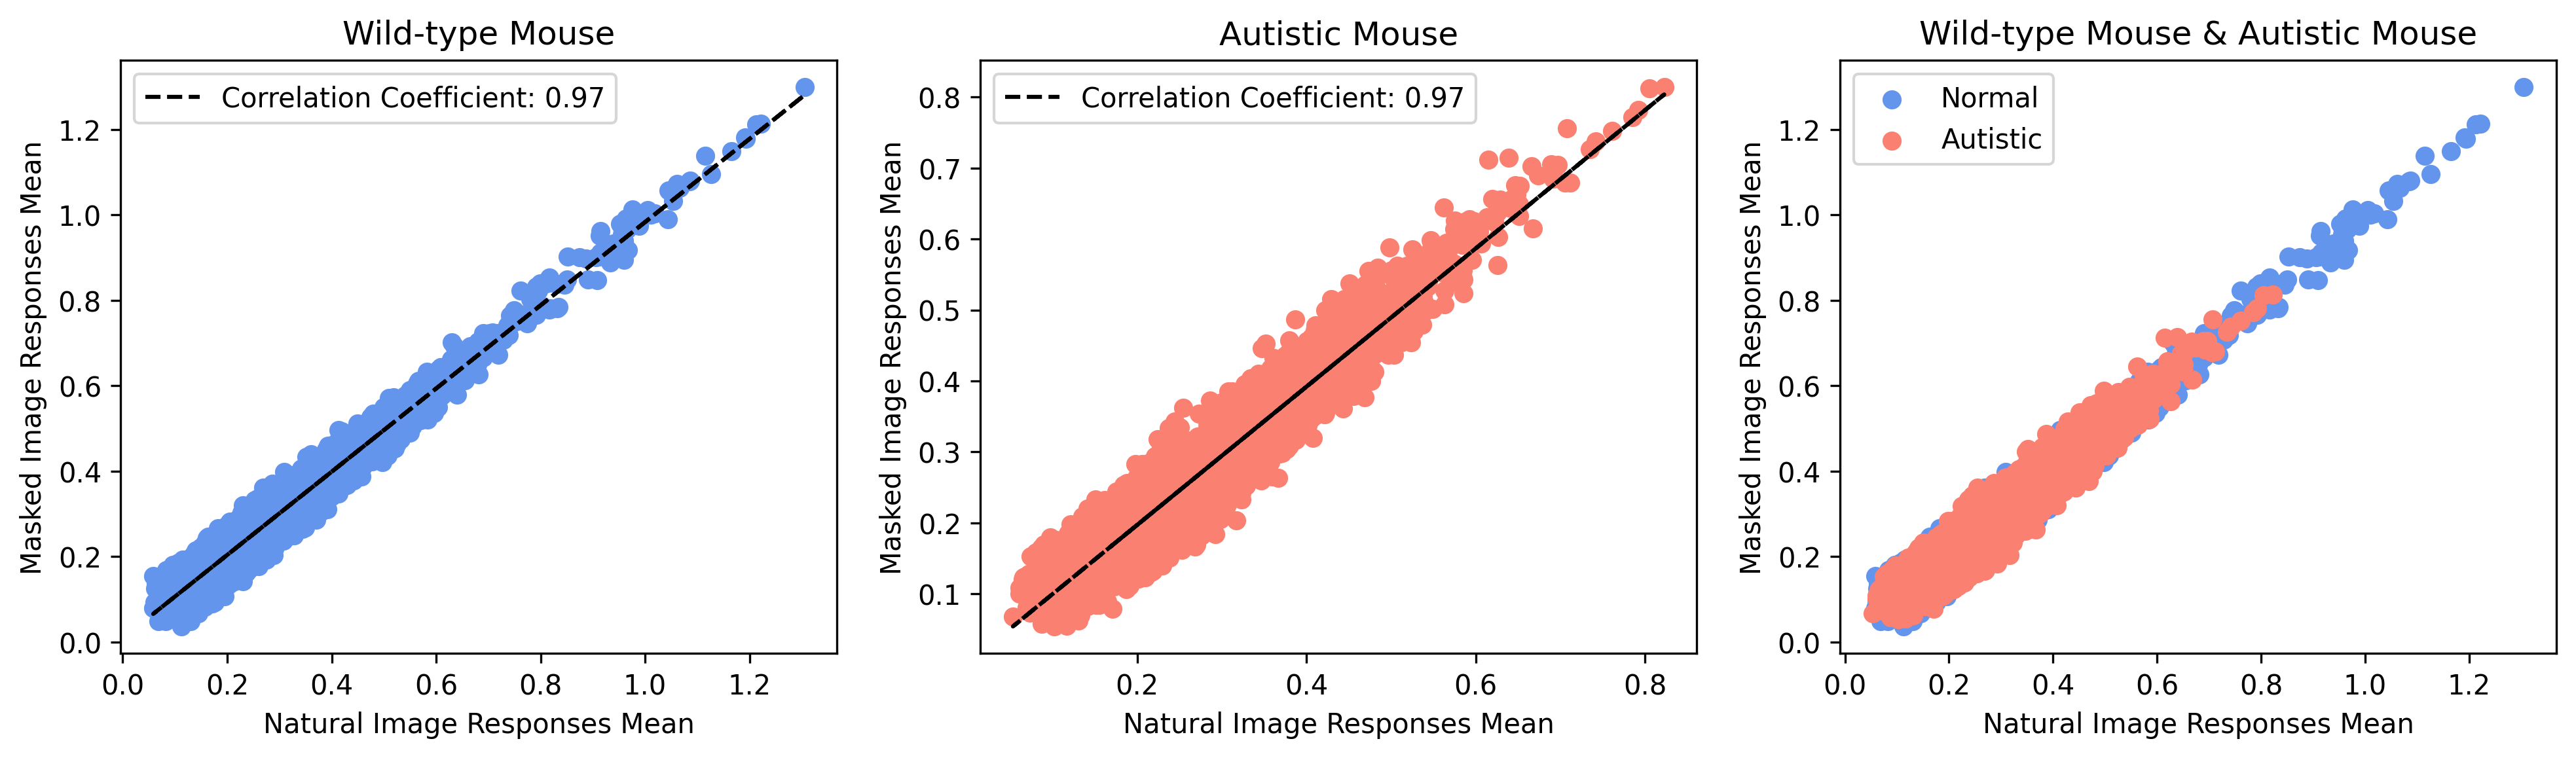

In [20]:
plt.figure(figsize=(16,4), dpi=300)

plt.subplot(1,3,1)
plt.title("Wild-type Mouse")
plt.scatter(x=np.mean(responses_train_wt[natural_indices_wt[:2300]], axis=0), y=np.mean(responses_train_wt[masked_indices_wt[:2300]], axis=0), color="cornflowerblue")
plt.plot(np.mean(responses_train_wt[natural_indices_wt[:2300]], axis=0), y_fit_wt, '--', color='black', label=f'Correlation Coefficient: {beta1_wt:.2f}')
plt.xlabel("Natural Image Responses Mean")
plt.ylabel("Masked Image Responses Mean")
plt.legend()

plt.subplot(1,3,2)
plt.title("Autistic Mouse")
plt.scatter(x=np.mean(responses_train_a[natural_indices_a[:2300]], axis=0), y=np.mean(responses_train_a[masked_indices_a[:2300]], axis=0), color="salmon")
plt.plot(np.mean(responses_train_a[natural_indices_a[:2300]], axis=0), y_fit_a, '--', color='black', label=f'Correlation Coefficient: {beta1_a:.2f}')
plt.xlabel("Natural Image Responses Mean")
plt.ylabel("Masked Image Responses Mean")
plt.legend()

plt.subplot(1,3,3)
plt.title("Wild-type Mouse & Autistic Mouse")
plt.scatter(x=np.mean(responses_train_wt[natural_indices_wt[:2300]], axis=0), y=np.mean(responses_train_wt[masked_indices_wt[:2300]], axis=0), label="Normal", color="cornflowerblue")
plt.scatter(x=np.mean(responses_train_a[natural_indices_a[:2300]], axis=0), y=np.mean(responses_train_a[masked_indices_a[:2300]], axis=0), label="Autistic", color="salmon")
plt.xlabel("Natural Image Responses Mean")
plt.ylabel("Masked Image Responses Mean")
plt.legend()
plt.savefig("Plots/ImageClassComparisonMeans.png", dpi=300)

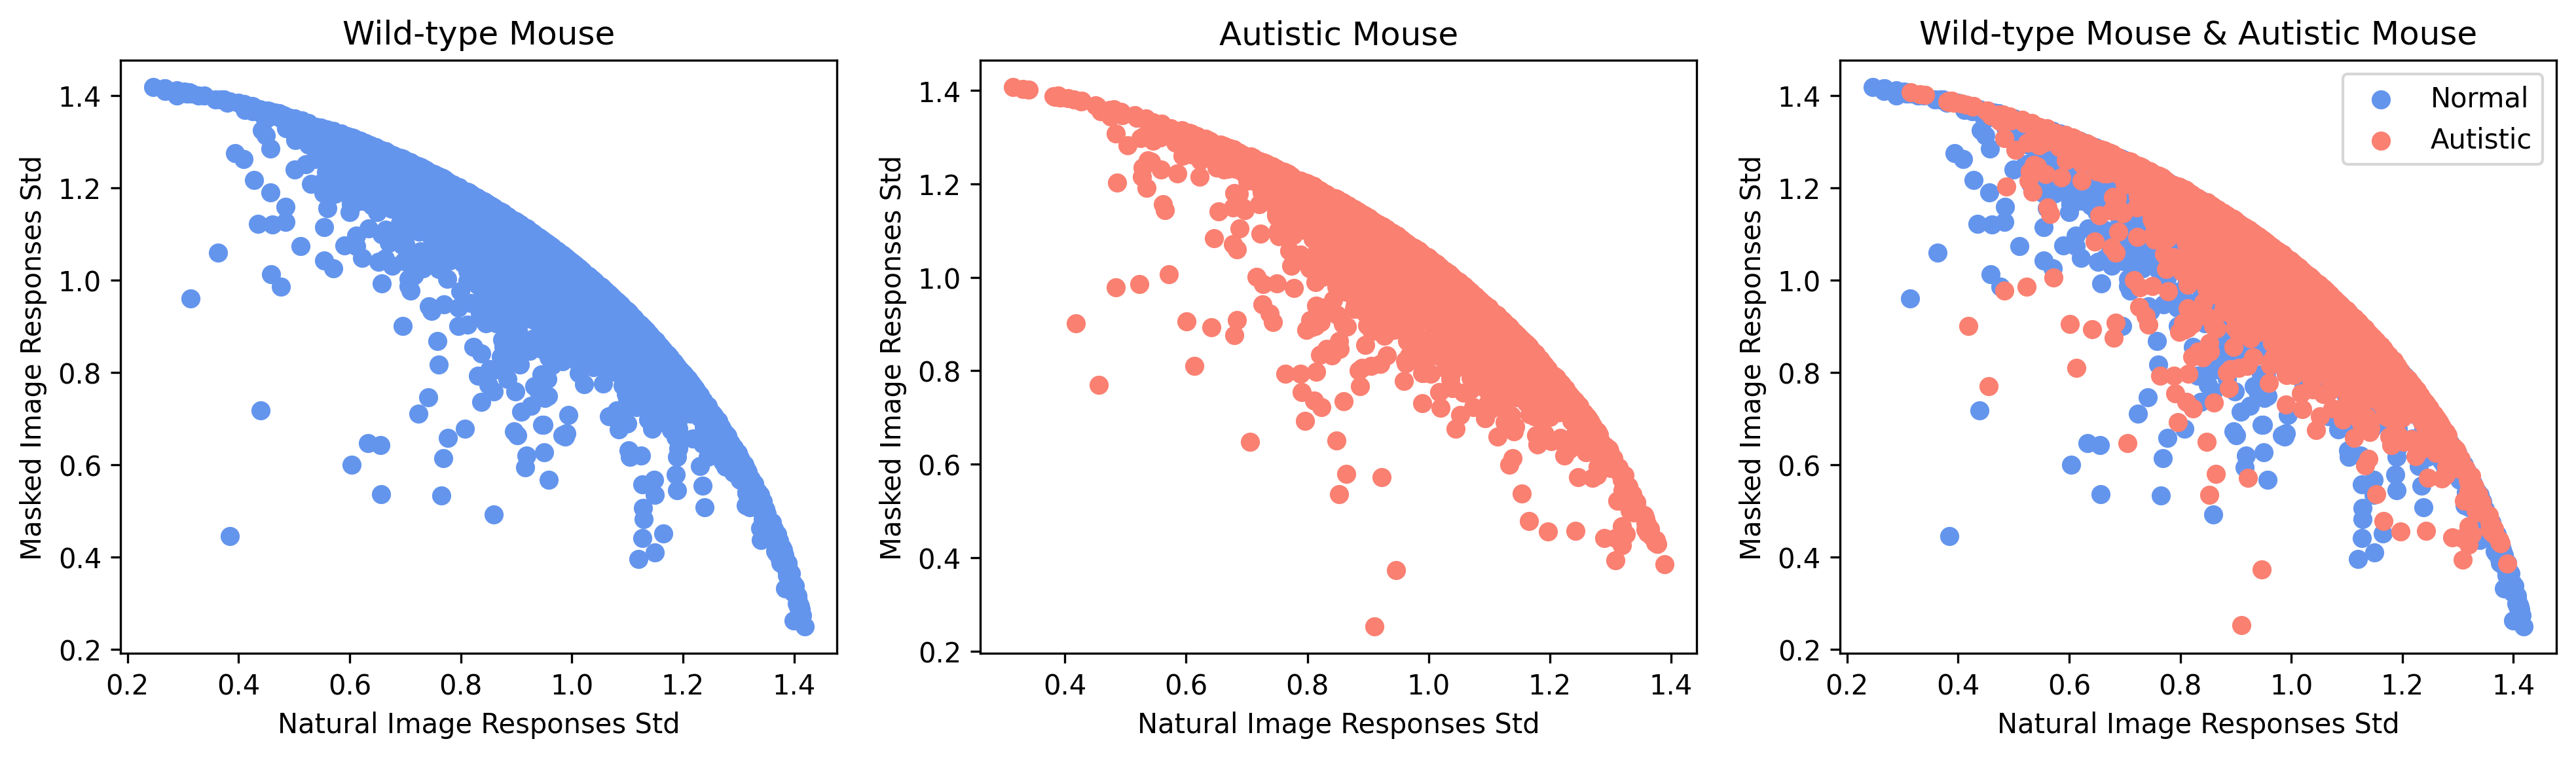

In [21]:
plt.figure(figsize=(16,4), dpi=300)

plt.subplot(1,3,1)
plt.title("Wild-type Mouse")
plt.scatter(x=np.std(responses_train_wt[natural_indices_wt[:2300]], axis=0), y=np.std(responses_train_wt[masked_indices_wt[:2300]], axis=0), color="cornflowerblue")
plt.xlabel("Natural Image Responses Std")
plt.ylabel("Masked Image Responses Std")

plt.subplot(1,3,2)
plt.title("Autistic Mouse")
plt.scatter(x=np.std(responses_train_a[natural_indices_a[:2300]], axis=0), y=np.std(responses_train_a[masked_indices_a[:2300]], axis=0), color="salmon")
plt.xlabel("Natural Image Responses Std")
plt.ylabel("Masked Image Responses Std")

plt.subplot(1,3,3)
plt.title("Wild-type Mouse & Autistic Mouse")
plt.scatter(x=np.std(responses_train_wt[natural_indices_wt[:2300]], axis=0), y=np.std(responses_train_wt[masked_indices_wt[:2300]], axis=0), label="Normal", color="cornflowerblue")
plt.scatter(x=np.std(responses_train_a[natural_indices_a[:2300]], axis=0), y=np.std(responses_train_a[masked_indices_a[:2300]], axis=0), label="Autistic", color="salmon")
plt.xlabel("Natural Image Responses Std")
plt.ylabel("Masked Image Responses Std")
plt.legend()
plt.savefig("Plots/ImageClassComparisonStds.png", dpi=300)